# Line Chart To Analyse Completed Units by Housing Type by Year Using HDB Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt

filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/CompletionStatusofHDBResidentialDevelopments.csv"

data = np.genfromtxt(filename,  
                               skip_header=1, 
                               dtype=[('financial','U10'),  ('type','U50'), ('status', 'U50'), ('no_of_units','i8')], 
                               delimiter=",",
                               missing_values=['na','-', 'NA'],filling_values=[0])

In [3]:
print(data[:10])
print(data.dtype)
print(data.shape)

[('2007', 'HDB Flats', 'Completed',  6247)
 ('2007', 'HDB Flats', 'Under Construction', 18073)
 ('2007', 'HDB Flats', 'Awarded', 10108)
 ('2007', 'DBSS', 'Completed',    -1)
 ('2007', 'DBSS', 'Under Construction',    -1)
 ('2008', 'HDB Flats', 'Completed',  1769)
 ('2008', 'HDB Flats', 'Under Construction', 31058)
 ('2008', 'HDB Flats', 'Awarded', 14754)
 ('2008', 'DBSS', 'Completed',    -1)
 ('2008', 'DBSS', 'Under Construction',    -1)]
[('financial', '<U10'), ('type', '<U50'), ('status', '<U50'), ('no_of_units', '<i8')]
(80,)


In [4]:
# Replace -1 with 0 in 'no_of_units' column
data['no_of_units'][data['no_of_units'] == -1] = 0

In [5]:
print(data[:10])
print(data.dtype)
print(data.shape)

[('2007', 'HDB Flats', 'Completed',  6247)
 ('2007', 'HDB Flats', 'Under Construction', 18073)
 ('2007', 'HDB Flats', 'Awarded', 10108)
 ('2007', 'DBSS', 'Completed',     0)
 ('2007', 'DBSS', 'Under Construction',     0)
 ('2008', 'HDB Flats', 'Completed',  1769)
 ('2008', 'HDB Flats', 'Under Construction', 31058)
 ('2008', 'HDB Flats', 'Awarded', 14754)
 ('2008', 'DBSS', 'Completed',     0)
 ('2008', 'DBSS', 'Under Construction',     0)]
[('financial', '<U10'), ('type', '<U50'), ('status', '<U50'), ('no_of_units', '<i8')]
(80,)


In [6]:
# Convert year to numeric values
years = data['financial'].astype(int)

# Extract data for Completed HDB Flats
x_HDB = years[(data['type'] == 'HDB Flats') & (data['status']=='Completed')]
y_HDB = data[(data['type'] == 'HDB Flats') & (data['status']=='Completed')]['no_of_units']


In [7]:
print(x_HDB)
print(x_HDB.shape)
print()
print(y_HDB)
print(y_HDB.shape)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
(16,)

[ 6247  1769  7050 11888 17947 11541 16881 26723 23716 25530 31325 15748
 13093  8234 13627 23782]
(16,)


In [8]:
# Extract data for Completed DBSS
x_DBSS = years[(data['type'] == 'DBSS') & (data['status']=='Completed')]
y_DBSS = data[(data['type'] == 'DBSS') & (data['status']=='Completed')]['no_of_units']

In [9]:
print(x_DBSS)
print(x_DBSS.shape)
print()
print(y_DBSS)
print(y_DBSS.shape)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
(16,)

[   0    0    0    0 1058 1203  806 3446  447    0    0    0    0    0
    0    0]
(16,)


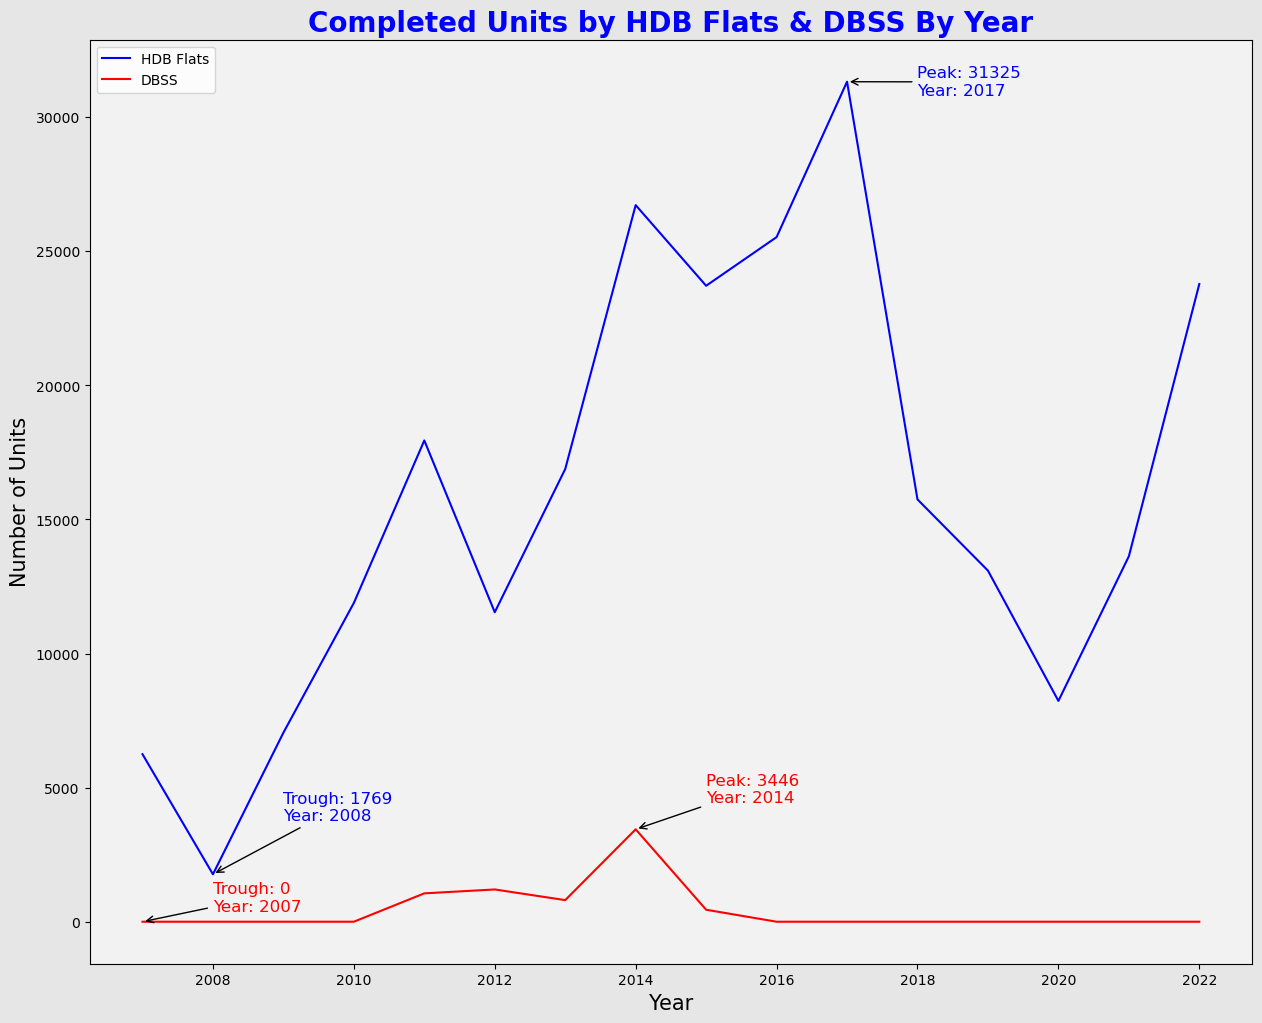

In [27]:
# Create Line Chart

fig, ax1 = plt.subplots(figsize=(15,12))

# Set background color for the axes and figure
ax1.set_facecolor('#f2f2f2')  # Light gray background for the plot area
fig.patch.set_facecolor('#e6e6e6')  # Slightly darker gray background for the figure

ax1.plot(x_HDB, y_HDB, c='b',  label='HDB Flats')
ax1.plot(x_DBSS,y_DBSS, c='r', label='DBSS')

plt.title('Completed Units by HDB Flats & DBSS By Year', fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Number of Units', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(loc='upper left');

# Ensure the x-axis has correct intervals
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Identify the peak and trough for HDB Flats
peak_HDB_index = np.argmax(y_HDB)
trough_HDB_index = np.argmin(y_HDB)
peak_HDB_year = x_HDB[peak_HDB_index]
trough_HDB_year = x_HDB[trough_HDB_index]
peak_HDB_value = y_HDB[peak_HDB_index]
trough_HDB_value = y_HDB[trough_HDB_index]

# Identify the peak and trough for DBSS
peak_DBSS_index = np.argmax(y_DBSS)
trough_DBSS_index = np.argmin(y_DBSS)
peak_DBSS_year = x_DBSS[peak_DBSS_index]
trough_DBSS_year = x_DBSS[trough_DBSS_index]
peak_DBSS_value = y_DBSS[peak_DBSS_index]
trough_DBSS_value = y_DBSS[trough_DBSS_index]

# Annotate the peak and trough for HDB Flats
ax1.annotate(f'Peak: {peak_HDB_value}\nYear: {peak_HDB_year}', 
             xy=(peak_HDB_year, peak_HDB_value), 
             xytext=(peak_HDB_year + 1, peak_HDB_value - 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='blue')

ax1.annotate(f'Trough: {trough_HDB_value}\nYear: {trough_HDB_year}', 
             xy=(trough_HDB_year, trough_HDB_value), 
             xytext=(trough_HDB_year + 1, trough_HDB_value + 2000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='blue')

# Annotate the peak and trough for DBSS
ax1.annotate(f'Peak: {peak_DBSS_value}\nYear: {peak_DBSS_year}', 
             xy=(peak_DBSS_year, peak_DBSS_value), 
             xytext=(peak_DBSS_year + 1, peak_DBSS_value + 1000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red')

ax1.annotate(f'Trough: {trough_DBSS_value}\nYear: {trough_DBSS_year}', 
             xy=(trough_DBSS_year, trough_DBSS_value), 
             xytext=(trough_DBSS_year + 1, trough_DBSS_value + 400),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red')

# Save the plot to a file
plt.savefig('Line Chart - Completed Units by HDB Flats & DBSS By Year.png', dpi=300, bbox_inches='tight')

plt.show()